In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [49]:
unemp_df=pd.read_csv('E:/Project_2/Unemployment in India.csv')
unemp_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
unemp_df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
unemp_df.shape

(768, 7)

In [8]:
unemp_df.size

5376

In [9]:
unemp_df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [11]:
# Mathematical perspective on our data
round(unemp_df[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate (%),740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [12]:
# correlation
unemp_df[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


In [15]:
# preprocessing
unemp_df.isnull().sum()
unemp_df.dropna(axis=0,inplace=True)  ## drop all nul values
unemp_df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [16]:
unemp_df.shape

(740, 7)

In [18]:
unemp_df.columns
# remove space
unemp_df.rename(columns={' Date':'Date',
                         ' Frequency':'Frequency',
                         ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                        ' Estimated Employed':'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [19]:
unemp_df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [20]:
# check duplicate value
unemp_df[unemp_df.duplicated()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area


In [22]:
unemp_df.duplicated().sum()  ## duplicate value count

0

In [23]:
unemp_df['Date']=pd.to_datetime(unemp_df['Date'])  ### convert date feature to datetime

In [24]:
unemp_df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [25]:
# creating day month and year coloum frrom datetime object  (some featurization)
unemp_df['day']=unemp_df['Date'].dt.day
unemp_df['month']=unemp_df['Date'].dt.month_name()
unemp_df['year']=unemp_df['Date'].dt.year

In [26]:
unemp_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


In [27]:
## Start some EDA
unemp_df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'day', 'month', 'year'],
      dtype='object')

In [28]:
# value count in region coloum
unemp_df['Region'].value_counts()

Haryana             28
Gujarat             28
Jharkhand           28
Delhi               28
West Bengal         28
Punjab              28
Himachal Pradesh    28
Andhra Pradesh      28
Chhattisgarh        28
Uttar Pradesh       28
Kerala              28
Maharashtra         28
Telangana           28
Tripura             28
Rajasthan           28
Karnataka           28
Tamil Nadu          28
Odisha              28
Bihar               28
Madhya Pradesh      28
Uttarakhand         27
Meghalaya           27
Puducherry          26
Assam               26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

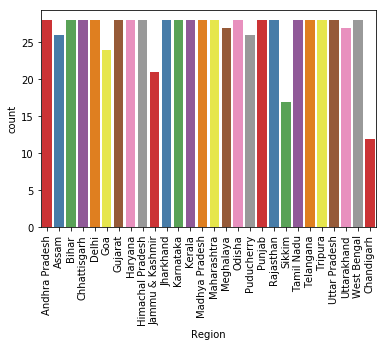

In [32]:
sns.countplot(x=unemp_df['Region'],palette = "Set1")
plt.xticks(rotation='vertical')
plt.show()

In [33]:
unemp_df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [ ]:
sns.countplot(x=unemp_df['Area'],palette = "Set2")
plt.show()

### data looks like almost balanced

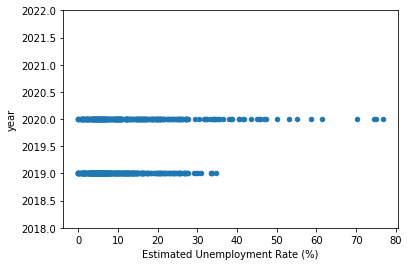

In [37]:
unemp_df.plot(kind="scatter", x='Estimated Unemployment Rate (%)', y='year')

# for changing y_axis range from 2018 to 2022
plt.ylim(2018,2022)
plt.show()

 #### it is showing unemployment rate in 2019 is less as compare to 2020

In [43]:
unemp_df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'day', 'month', 'year'],
      dtype='object')

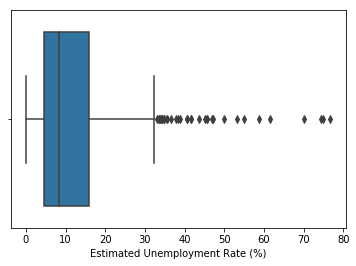

In [44]:
sns.boxplot(unemp_df['Estimated Unemployment Rate (%)'])

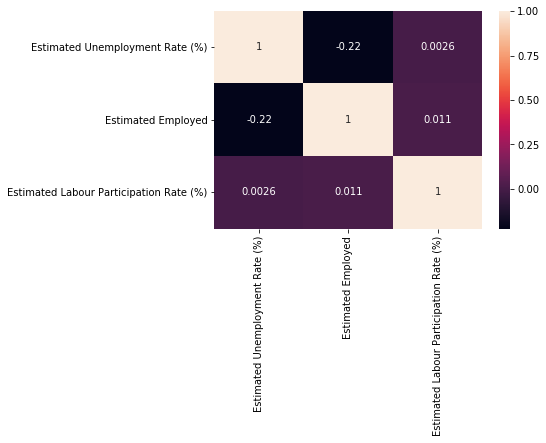

In [45]:
sns.heatmap(unemp_df[['Estimated Unemployment Rate (%)',
                'Estimated Employed',
                'Estimated Labour Participation Rate (%)']].corr(),
            annot=True
           )
plt.show()

In [59]:
unemp_df.rename(columns={' Estimated Unemployment Rate (%)':'EUR',
                        ' Estimated Employed':'EE',
                        ' Estimated Labour Participation Rate (%)':'ELPR'},inplace=True)

In [65]:
drop_unemp_df=unemp_df.dropna()
drop_unemp_df

,Region,Date,Frequency,EUR,EE,ELPR,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [69]:
import plotly.express as px
region = unemp_df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [66]:
unemployment = drop_unemp_df[["Area", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Area','Region'], values='EUR',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()

#### Conclution:
By doing analysis on top of the data i saw that yes there is more unemployemnet  in 2020 becouse of covid factor and i visulize pie chart that can easily explain unemployment factor in different different states catogrized as per urban and rural zone 